#### **Universidade Federal da Bahia.**
#### **Departamento de Eng. Elétrica e Computação**
#### **Avaliação 2 - Introdução ao Aprendizado de Máquina**
#### Semestre: 2023.2
#### Alunos : Ricardo Machado e Rodrigo Pimentel


### Questão 2: Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. Implemente a regressão no Jupyter Notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error, make_scorer

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [8, 6]

#### Análise do banco de dados.

In [4]:
#carregando o banco de dados
car_dataset = pd.read_csv('car data.csv')

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checando o número de linhas e colunas
car_dataset.shape

(301, 9)

In [7]:
#Mais informações sobre o banco de dados
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checando o número de valores vazios(nulos)
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Não há valores nulos no banco de dados, como visto acima.

In [9]:
# checando a distribuição do banco de dados
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Análise e Pré-processamento de dados.

In [10]:
#atribuindo dados numericos às palavras
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
#Estatística descritiva do banco de dados.
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [13]:
#Dividindo dados e o alvo de predição
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [15]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

##### Devido a diferença de escala entre os atributos preditivos utiliza-se a normalização min-max no conjunto de dados.

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
X_minmax = scaler.fit_transform(X,Y)

In [18]:
#Divisão dos conjuntos de teste e treinamento.
X_train, X_test, Y_train, Y_test = train_test_split(X_minmax, Y,test_size= 0.3,random_state=2)

#### Determina-se o número de vizinhos(K) que minimiza o erro quadrático médio.

O número de vizinhos associado a melhor perfomance do modelo KNN é obtido através de um loop, que visa encontrar o valor de K associado ao menor erro quadrático médio.

In [19]:
range_knn = range(1, 30, 2)
scores_mse = []
for k in range_knn:
    knn_reg = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    knn_reg.fit(X_train, Y_train)
    Y_pred=knn_reg.predict(X_test)
    scores_mse.append(mean_squared_error(Y_test,Y_pred))

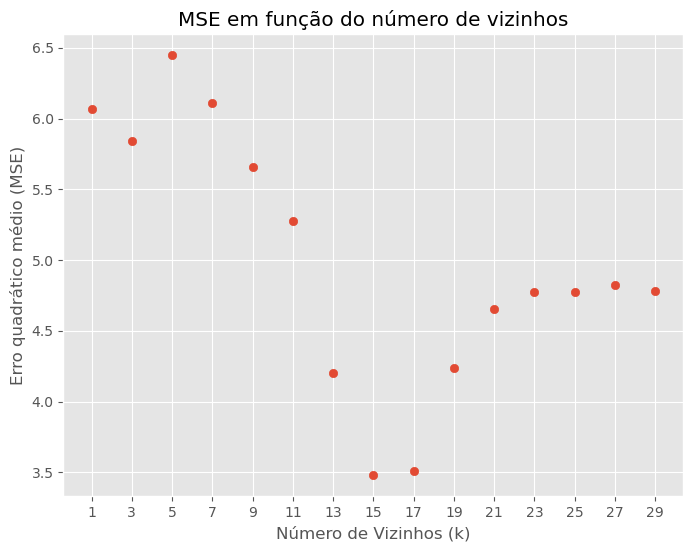

In [20]:
#Gráfico do erro quadrático médio vs K
plt.figure(1)
plt.scatter(range_knn,scores_mse)
plt.xticks(range_knn)
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro quadrático médio (MSE)')
plt.title('MSE em função do número de vizinhos')
plt.show()

O erro quadrático médio é mínimo quando o número de vizinhos é 15.

#### Configuração do modelo KNN utilizado no trabalho.


In [21]:
#treinamento do modelo
knn_reg=KNeighborsRegressor(n_neighbors = 15)
knn_reg.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=15)

#### Medidas de desempenho do modelo.

In [22]:
#avaliação do modelo(erro quadrático médio)
Y_pred=knn_reg.predict(X_test)
print(mean_squared_error(Y_test,Y_pred))

3.4797994969474977


(0.0, 12.5)

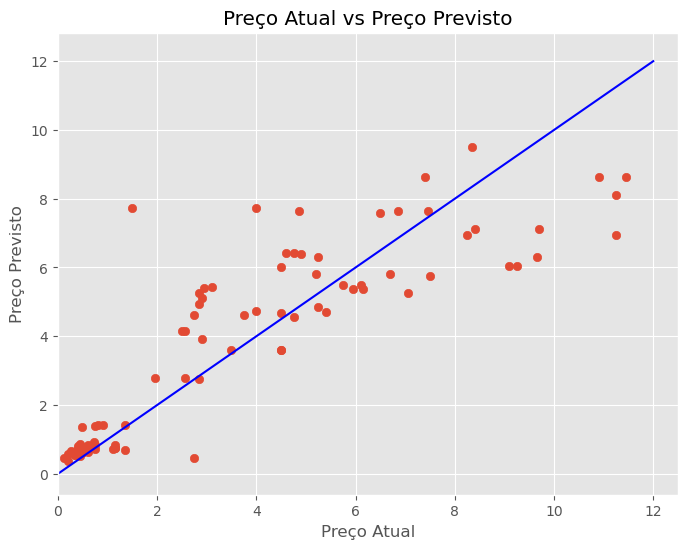

In [23]:
#preços atuais e Preço Previsto
t = np.linspace(0,12)
plt.scatter(Y_test, Y_pred, label='Pontos de Dados')
plt.plot(t, t, color='blue', label='Linha ideal')
plt.xlabel("Preço Atual")
plt.ylabel("Preço Previsto")
plt.title("Preço Atual vs Preço Previsto")
plt.xlim([0, 12.5])

In [24]:
mse_val_cruzada = cross_val_score(knn_reg, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")

Pela convenção do Scikit-Learn a função cross_val_score retorna o erro quadrático médio com sinal negativo.

In [25]:
-np.mean(mse_val_cruzada)

10.020282529100527

A média do MSE obtido para o modelo com a validação cruzada 10-fold é 10,020